In [2]:
import random
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
sns.set(
    font_scale=1.5,
    style="whitegrid",
    rc={'figure.figsize':(15,5)}
        )

###  1. Создание ДФ



Дата-фрейм будет состоять из 10000 строк и 5 колонок.
Каждую из колонок мы предлагаем тебе создать и наполнить далее.

1-я колонка - user_id. Длина user_id должна равняться 15-ти символам и состоять из случайной комбинации следующих символов:  "1234567890abcdefghijk". Комбинации каждого id в df формируются рандомно.

2-я колонка - номер заказа. Случайные значения лежат в диапазоне от 1 до 10.

3-я колонка - время доставки. Значения берутся из нормального распределения со средним 1440 и стандартным отклонением в 200.

4-я колонка - общая стоимость заказа. Значения берутся из экспоненциального распределения с параметром лямбда = 1,     смещённого на +1.

5-я колонка - ретеншен - день жизни покупателя, в который он совершил заказ. Сгенерировать значения 1,2,3,4,5     с соответствующими вероятностями 0.35, 0.25, 0.2, 0.15, 0.05.

В случае дублей user_id, оставьте только первую из дублирующихся записей.


In [4]:
df = pd.DataFrame()

In [5]:
st = "1234567890abcdefghijk"

In [6]:
df['user_id'] = [''.join((random.sample(st, 15))) for x in range(10000) ]

In [7]:
df['order_id'] = [random.randint(1, 10) for x in range(10000) ]

In [8]:
df['delivery_time'] = sps.norm(loc=1440, scale=200).rvs(size=10000)

In [9]:
df['order_cost'] = sps.expon(scale=1).rvs(size=10000) + 1

In [10]:
df['retention'] = random.choices([1, 2, 3, 4, 5], weights=[0.35, 0.25, 0.2, 0.15, 0.05], k=10000)

In [11]:
df = df.drop_duplicates(subset='user_id', keep='first', ignore_index=True)

In [12]:
df.delivery_time = df.delivery_time.apply(lambda x: int(x))   # округлил время до целых (секунды?)
df.order_cost = df.order_cost.apply(lambda x: round(x, 2))    # округлил стоимость до сотых

In [13]:
df.head(3)

,user_id,order_id,delivery_time,order_cost,retention
0,gbia791dc0jk3f4,2,1642,2.10,3
1,bek48015giaf6jh,9,1650,1.89,5
2,5h821keb6d40j7i,6,1784,1.70,4


### 2.	Дополнение ДФ

•	Добавьте новый столбец - для всех строк исходного дата-сета, сгруппированных по номеру заказа, присвойте среднее значение времени доставки по группе.

•	Определите сегмент, к которому относится пользователь, на основании номера заказа, который у него указан. Определённый сегмент присвойте каждому пользователю в новом столбце. Сегмент состоит из диапазона заказов по 3. Итоговые лейблы сегментов в новом столбце должны выглядеть так: "1-3","4-6" и т.д.

•	Берём группы по 2000 строк дата-фрейма, отбираемых по порядку. Переменную "Общая стоимость заказа" в группах последовательно перемножьте на 1,2,3,4,5. То есть в первой группе умножаем переменную на 1, во 2-й – на 2 и т.д. Полученные значения должны заменить прежние.

ЗАДАНИЕ ПОСЛОЖНЕЕ - НЕОБЯЗАТЕЛЬНОЕ

•	Отдельной колонкой добавьте значения последовательности, начинающейся с 0,1, где каждый следующий элемент является суммой двух предыдущих, умноженных на 0.5


In [14]:
# для всех строк исходного дата-сета, сгруппированных по номеру заказа, присвойте среднее значение времени доставки по группе
time_avg = df.groupby('order_id', as_index=False) \
                .delivery_time.mean() \
                .astype('int')  \
                .rename(columns={"delivery_time": "time_avg"})

In [15]:
df = df.merge(time_avg, how='inner', on='order_id')

In [16]:
# Определите сегмент, к которому относится пользователь, на основании номера заказа, который у него указан
df['order_seg'] = pd.cut(df.order_id, bins=[0, 3, 6, 10], labels=["1-3", "4-6", "7-10"]) # в последнем сегменте 4 значения

In [17]:
# Переменную "Общая стоимость заказа" в группах последовательно перемножьте на 1,2,3,4,5
df.order_cost = df.order_cost * (df.index // 2000 + 1)

In [18]:
# Отдельной колонкой добавьте значения последовательности, начинающейся с 0,1
def fib_half(fib_lst):
    for i in range(2, 10000):
        fib_lst.append((fib_lst[i-1] + fib_lst[i-2]) * 0.5)
    return fib_lst

In [19]:
df['fib_half'] = fib_half([0, 1])

### 3. Исследование ДФ

•	Посчитайте или покажите моду, медиану, среднее, дисперсию и стандартное отклонение для 4-й колонки - суммы стоимости заказа.

•	Постройте график, который наиболее полно, на ваш взгляд, описывает время доставки заказа в зависимости от его номера.

ЗАДАНИЕ ПОСЛОЖНЕЕ – НЕОБЯЗАТЕЛЬНОЕ

•	 В виде единой матрицы графиков построить графики распределения времени доставки для каждого номера заказа. Каждый отдельный график в матрице должен иметь свой цвет и на каждом из графиков максимум необходимо выделить любым цветом, отличным от основного цвета выбранного графика.


In [20]:
df.head(2)

,user_id,order_id,delivery_time,order_cost,retention,time_avg,order_seg,fib_half
0,gbia791dc0jk3f4,2,1642,2.10,3,1448,1-3,0.0
1,e12k67i93fgjdb8,2,1467,1.03,4,1448,1-3,1.0


''

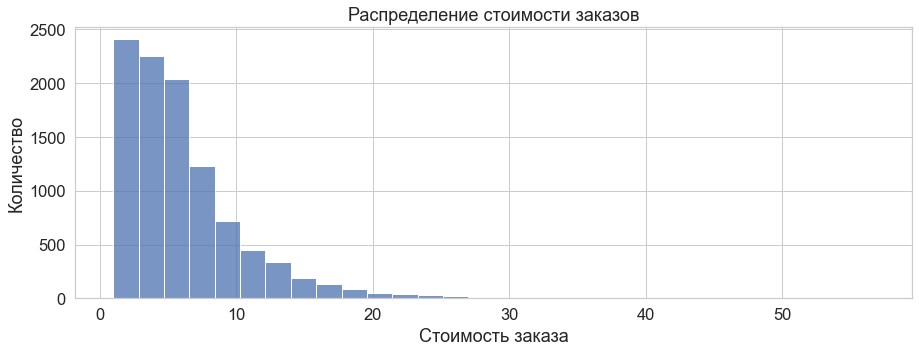

In [21]:
# распределение стоимости заказов
ax = sns.histplot(df.order_cost, bins=30)
ax.set_ylabel('Количество') 
ax.set_xlabel('Стоимость заказа')
ax.set_title('Распределение стоимости заказов')
;

In [22]:
# мода
df.order_cost.mode()

0    4.08
dtype: float64

In [23]:
# медиана
df.order_cost.median()

5.01

In [24]:
# среднее
df.order_cost.mean()

6.0226490000000235

In [25]:
# дисперсия
df.order_cost.var() 

19.543464479246914

In [26]:
# стандартное отклонение
df.order_cost.std()

4.4207990770048475

''

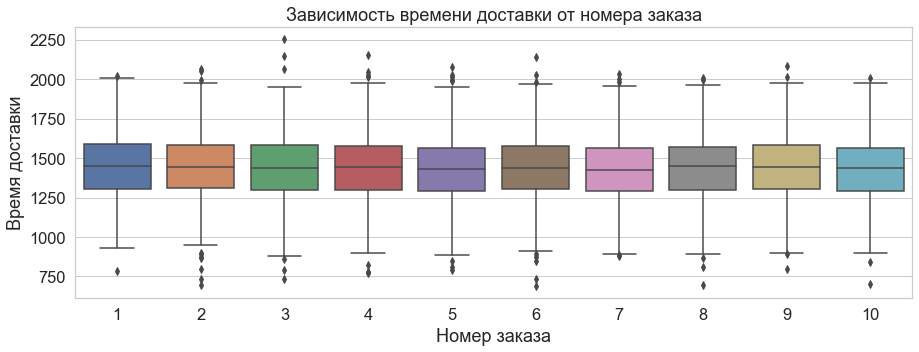

In [27]:
#Постройте график, который наиболее полно, на ваш взгляд, описывает время доставки заказа в зависимости от его номера.
ax = sns.boxplot(x='order_id', y='delivery_time', data=df)
ax.set_ylabel('Время доставки') 
ax.set_xlabel('Номер заказа')
ax.set_title('Зависимость времени доставки от номера заказа')
;

In [28]:
# В виде единой матрицы графиков построить графики распределения времени доставки для каждого номера заказа. 

In [29]:
from matplotlib.patches import Rectangle

In [30]:
color_dic = {1: 'pink', 2: 'lightblue', 3:'orange', 
             4: 'hotpink', 5: 'orchid', 
             6: 'firebrick', 7: 'gold', 8: 'forestgreen', 
             9: 'slategrey', 10:'lightgreen'}

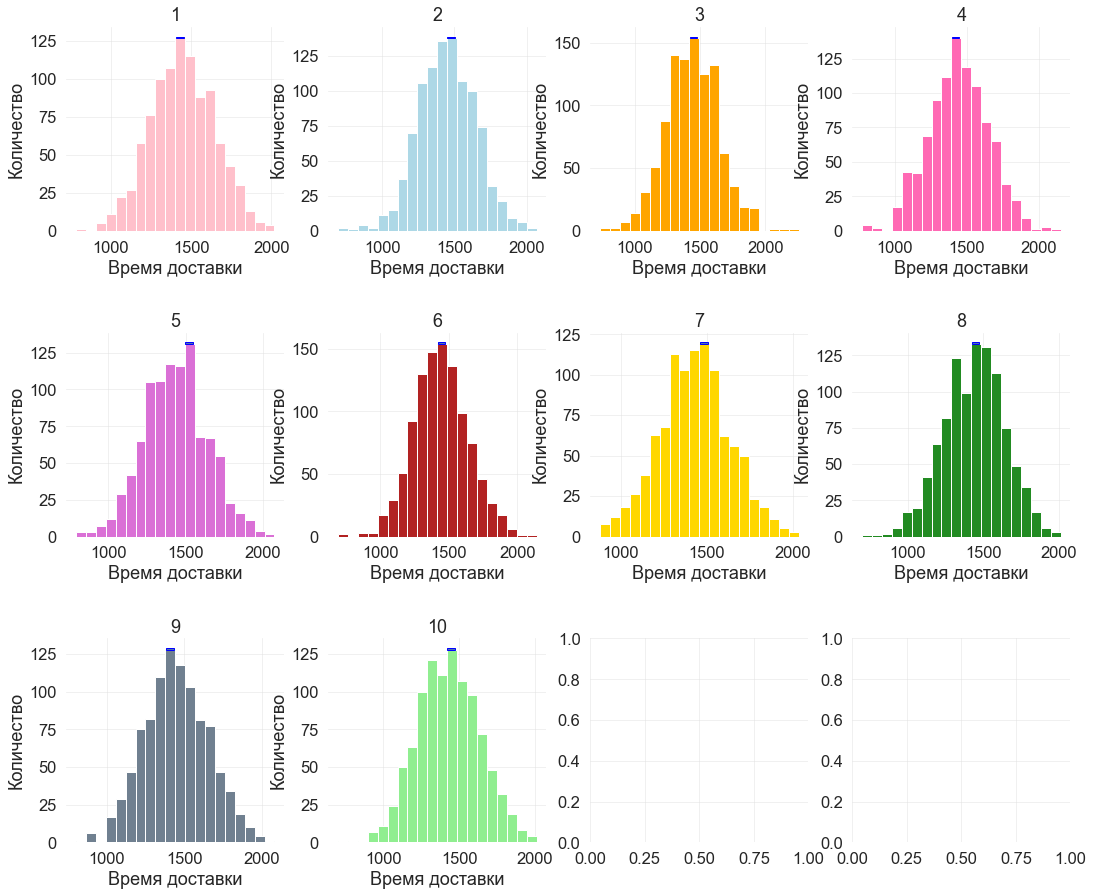

''

In [32]:
bins = 20
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 15))


for ax, user, sub_df in  zip(axes.flatten(),
                             [t for t in sorted(df.order_id.unique())],
                             [df.query('order_id == @t') for t in sorted(df.order_id.unique())]): 
# как вариант, можно и по-другому
#     sns.distplot(sub_df['delivery_time'], kde=False, color=color_dic[user], 
#                  #bins=sub_df['delivery_time'].unique().size, 
#                  ax=ax)
    x, y, _ = ax.hist(sub_df['delivery_time'], color=color_dic[user], bins=bins)
    ax.add_patch(Rectangle((y[np.where(x == x.max())]+2, x.max()),
                           y.max()/(2* bins), 1, fill=True, edgecolor='blue', lw=1))    
    
for ax in axes.flatten():
    # удаляем рамку
    ax.set_frame_on(False)  
    # делаем сетку графика совсем немного серой и наполовину прозрачной
    ax.grid(True, color='#e2e2e2', alpha=0.5)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    

for name, ax in zip(sorted(df.order_id.unique()), axes.flatten()):
    ax.set(title='{}'.format(name))
    ax.tick_params(labelbottom=True, which='both')
    ax.set_ylabel('Количество') 
    ax.set_xlabel('Время доставки')
    
    
plt.show()
;

### 4.	Кластеризация

•	Любым удобным методом кластеризуйте пользователей, на основании переменных "время заказа" и "сумма заказа"
•	Обоснуйте число выбранных кластеров и присвойте их значения пользователям в отдельном столбце

''

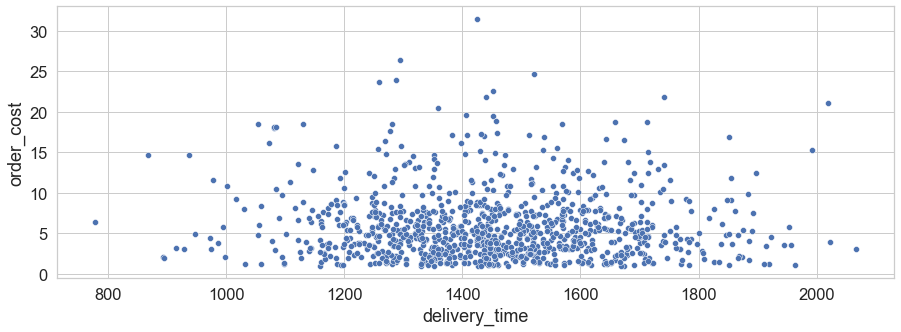

In [33]:
# визуально кластеры выделить не получается
sns.scatterplot(data=df.sample(1000), x="delivery_time", y="order_cost")
;

Предполагаю, что существует практика по разделению товаров по стоимости, мне ее не удалось найти. Можно было бы применить один из методов машинного обучения, например k-средних, но тогда встает вопрос с интерпретацией данных, да и там нужно задавать изначальное количество кластеров, которое не очевидно.
Предлагаю разделить стоимость заказа по 0.75 процентилю на "дешевые" и "дорогие", это примерно делит общую сумму по колонке order_cost пополам. 

Время доставки распределено нормально, его поделим на три группы:

"медленно": значение выше одного стандартного отклонения от среднего

"средне": плюс-минус одно std

"быстро": ниже одного стандартного отклонения

Таким образом у нас получится 6 групп.

In [34]:
# сегментируем стоимость заказа
df['order_cost_seg'] = pd.qcut(df.order_cost, q=[0, 0.75, 1.], labels=["дешево", "дорого"])

In [35]:
# сегментируем время доставки
df['delivery_seg'] = pd.cut(df.delivery_time,
                           bins=[df.delivery_time.min(),
                                 df.delivery_time.mean() - df.delivery_time.std(),
                                 df.delivery_time.mean() + df.delivery_time.std(),
                                 df.delivery_time.max()],
                           labels=["быстро", "средне", "долго"])

In [36]:
df['cost_delivery_seg'] = df.agg('{0[order_cost_seg]}-{0[delivery_seg]}'.format, axis=1)

In [37]:
df.head(3)

,user_id,order_id,delivery_time,order_cost,retention,time_avg,order_seg,fib_half,order_cost_seg,delivery_seg,cost_delivery_seg
0,gbia791dc0jk3f4,2,1642,2.10,3,1448,1-3,0.0,дешево,долго,дешево-долго
1,e12k67i93fgjdb8,2,1467,1.03,4,1448,1-3,1.0,дешево,средне,дешево-средне
2,3cb84a79g1fd0i5,2,1593,1.60,5,1448,1-3,0.5,дешево,средне,дешево-средне


### 5.	АБ

•	Выберите два любых кластера пользователей и проведите их сравнение

•	ЗАДАНИЕ ПОСЛОЖНЕЕ – НЕОБЯЗАТЕЛЬНОЕ
Выберите три любых кластера и проведите их сравнение

***
Неочевидно, какую метрику требуется сравнить. Сравнивать по времени доставки или стоимости заказа кажется бессмысленным, ведь кластеры разделены по этим метрикам.
Поэтому буду анализировать метрику retention, что несколько стренно, ведь скорость доставки не может влиять на время первого заказа (потому что когда случился первый заказ, времени доставки еще не было). С другой стороны, можно предположить, что c retention каким-то образом коррелирует стоимость заказа.

Соответственно нулевая гипотеза звучит как - для разных кластеров среднее значение retention не различается.

Для примера выберем наиболее отдаленные кластера: 'дешево-долго' и 'дорого-быстро'

In [83]:
cheap_slow = df[df.cost_delivery_seg == 'дешево-долго']
expensive_fast = df[df.cost_delivery_seg == 'дорого-быстро']

''

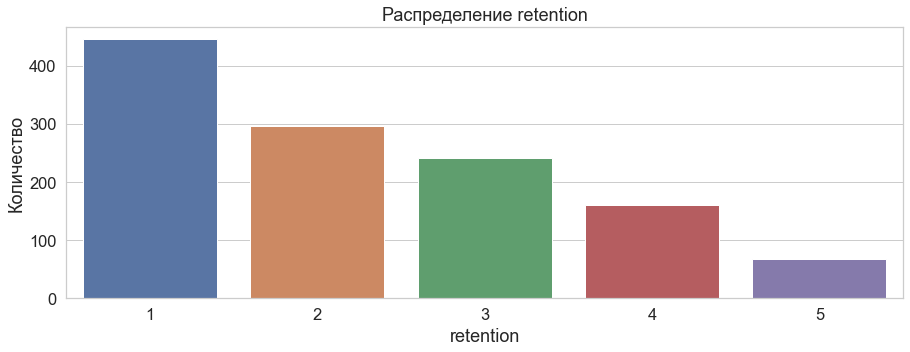

In [84]:
ax = sns.countplot(data=cheap_slow, x='retention')
ax.set_ylabel('Количество') 
ax.set_xlabel('retention')
ax.set_title('Распределение retention')
;

''

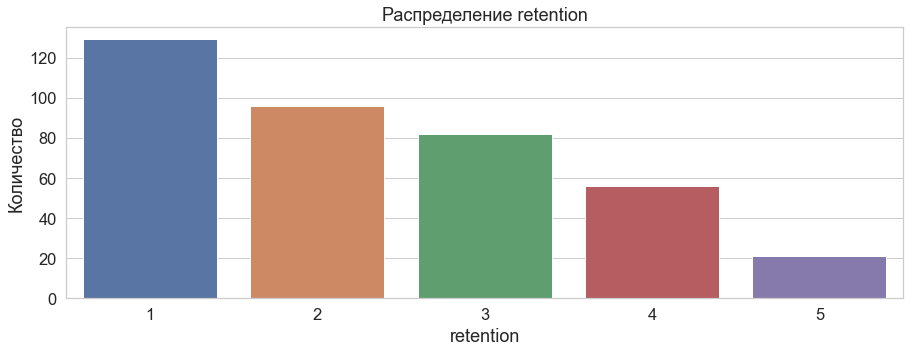

In [85]:
ax = sns.countplot(data=expensive_fast, x='retention')
ax.set_ylabel('Количество') 
ax.set_xlabel('retention')
ax.set_title('Распределение retention')
;

In [86]:
print(cheap_slow.shape[0], expensive_fast.shape[0])

1212 384


Выборки не равны по размеру, увеличим меньшую путем случайного сэмплирования с возвращением

In [87]:
expensive_fast_sample = expensive_fast.sample(cheap_slow.shape[0], replace=True)

Для проверки гипотезы применим тест Стьюдента.

Проверим выборки на соблюдение условия гомогенности дисперсии тестом Левена

In [88]:
from scipy.stats import levene, ttest_ind, f_oneway

In [89]:
stat, p = levene(cheap_slow.retention, expensive_fast_sample.retention)
p

0.877109445395804

Тест показывает, что дисперсии выборок гомогенны

Данные распределены не нормально, однако, критерий Стьюдента не требует нормальности распределения при соблюдении условия, что выбороные средние распределены нормально (ЦПТ). Можно было бы синтезировать случайные подвыборки, чтобы проверить распределение средних, для сокращения времени проигнорирую этот шаг и буду считать что тест можно применять

In [90]:
ttest_ind(cheap_slow.retention, expensive_fast_sample.retention)

Ttest_indResult(statistic=-1.4099923704455852, pvalue=0.15867033613867706)

**Значение pvalue не позволяет говорить о разнице средних retention для двух кластеров**

''

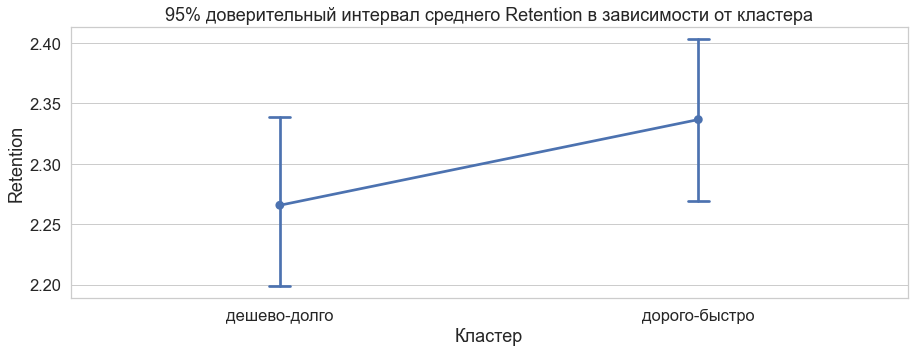

In [91]:
data = pd.concat([cheap_slow, expensive_fast_sample])
sns.pointplot(x = 'cost_delivery_seg', y = 'retention', data = data, capsize = .05)
plt.title('95% доверительный интервал среднего Retention в зависимости от кластера')
plt.xlabel('Кластер')
plt.ylabel('Retention')
;

In [92]:
#Выберите три любых кластера и проведите их сравнение

Добавим третий кластер "дешево-средне"

In [93]:
cheap_medium = df[df.cost_delivery_seg == 'дешево-средне']

Доведем размеры кластеров до одинаковых

In [94]:
cheap_slow_sample = cheap_slow.sample(cheap_medium.shape[0], replace=True)
expensive_fast_sample = expensive_fast.sample(cheap_medium.shape[0], replace=True)

Тестировать средние значения retention будем с помощью однофакторного дисперсионного анализа

In [95]:
stat, p = levene(cheap_slow_sample.retention, expensive_fast_sample.retention, cheap_medium.retention)
p

0.034053877275176656

Предположение о гомогенности дисперсий все еще соблюдается.

In [96]:
f_oneway(cheap_slow_sample.retention, expensive_fast_sample.retention, cheap_medium.retention)

F_onewayResult(statistic=1.0104794719046855, pvalue=0.3640685591784962)

**Значение pvalue не позволяет отвергнуть нулевую гипотезу о равенстве средних**

''

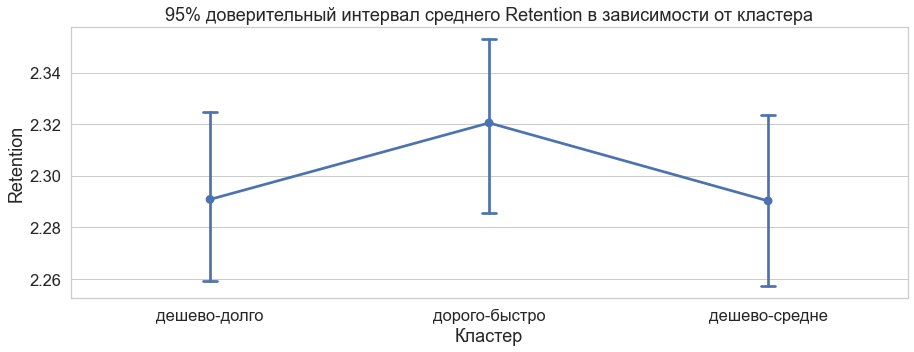

In [97]:
data = pd.concat([cheap_slow_sample, expensive_fast_sample, cheap_medium])
sns.pointplot(x = 'cost_delivery_seg', y = 'retention', data = data, capsize = .05)
plt.title('95% доверительный интервал среднего Retention в зависимости от кластера')
plt.xlabel('Кластер')
plt.ylabel('Retention')
;